In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

In [ ]:
training_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [ ]:
#Scaling
training_df["median_house_value"] /= 1000.0
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [ ]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [ ]:
def build_model(my_learning_rate):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model
def train_model(model,df,feature,label,epochs,batch_size):
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs=history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse


In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()

In [ ]:
def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

Epoch 1/30
567/567 [==============================] - 1s 975us/step - loss: 3107070.0000 - root_mean_squared_error: 1762.6882
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 28392.6074 - root_mean_squared_error: 168.5011
Epoch 3/30
567/567 [==============================] - 1s 962us/step - loss: 27662.9629 - root_mean_squared_error: 166.3219
Epoch 4/30
567/567 [==============================] - 1s 966us/step - loss: 26702.5977 - root_mean_squared_error: 163.4093
Epoch 5/30
567/567 [==============================] - 1s 924us/step - loss: 25848.1230 - root_mean_squared_error: 160.7735
Epoch 6/30
567/567 [==============================] - 1s 927us/step - loss: 25338.7793 - root_mean_squared_error: 159.1816
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24626.0508 - root_mean_squared_error: 156.9269
Epoch 8/30
567/567 [==============================] - 1s 979us/step - loss: 23989.8691 - root_mean_squared_error: 154.8866
Epoch 9/30
567/56

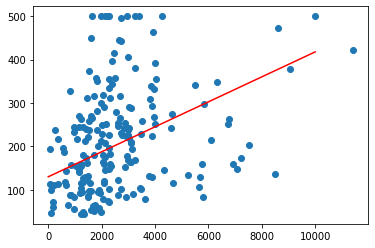

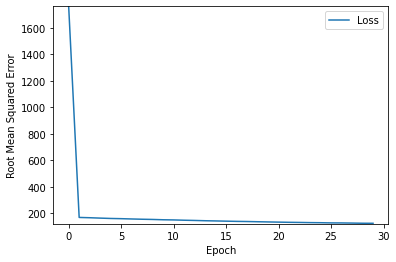

In [ ]:
learning_rate = 0.01
epochs = 30
batch_size = 30
my_feature = "total_rooms"  
my_label="median_house_value" 
my_model = None
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             187
 3400     92             228
 3677     69             236
 2202     62             194
 2403     80             199
 5652    295             293
 3318    500             226
 2552    342             204
 1364    118             169
 3468    128             230


Epoch 1/18
5667/5667 [==============================] - 5s 942us/step - loss: 35171.5195 - root_mean_squared_error: 187.5407
Epoch 2/18
5667/5667 [==============================] - 5s 931us/step - loss: 20381.6445 - root_mean_squared_error: 142.7643
Epoch 3/18
5667/5667 [==============================] - 5s 935us/step - loss: 18336.3008 - root_mean_squared_error: 135.4116
Epoch 4/18
5667/5667 [==============================] - 5s 934us/step - loss: 18141.8398 - root_mean_squared_error: 134.6916
Epoch 5/18
5667/5667 [==============================] - 6s 1ms/step - loss: 18100.1895 - root_mean_squared_error: 134.5369
Epoch 6/18
5667/5667 [==============================] - 6s 1ms/step - loss: 17877.9727 - root_mean_squared_error: 133.7085
Epoch 7/18
5667/5667 [==============================] - 5s 940us/step - loss: 18434.2109 - root_mean_squared_error: 135.7726
Epoch 8/18
5667/5667 [==============================] - 5s 930us/step - loss: 17755.9414 - root_mean_squared_error: 133.2514
Epoc

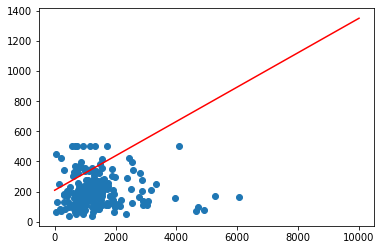

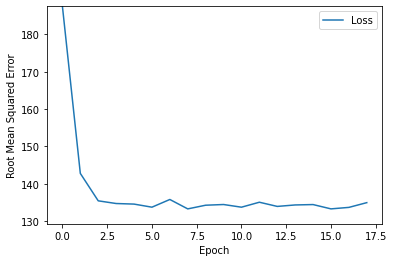

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             356
 1867     92             422
 2191     69             459
 1052     62             329
 1647     80             397
 2312    295             473
 1604    500             392
 1066    342             331
  338    118             248
 1604    128             392


In [ ]:
#@title Double-click to view a possible solution.

my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Epoch 1/24
567/567 [==============================] - 1s 975us/step - loss: 38304.0977 - root_mean_squared_error: 195.7143
Epoch 2/24
567/567 [==============================] - 1s 957us/step - loss: 18943.5684 - root_mean_squared_error: 137.6356
Epoch 3/24
567/567 [==============================] - 1s 936us/step - loss: 15144.0215 - root_mean_squared_error: 123.0611
Epoch 4/24
567/567 [==============================] - 1s 955us/step - loss: 14888.1689 - root_mean_squared_error: 122.0171
Epoch 5/24
567/567 [==============================] - 1s 943us/step - loss: 14690.7920 - root_mean_squared_error: 121.2056
Epoch 6/24
567/567 [==============================] - 1s 943us/step - loss: 14565.5566 - root_mean_squared_error: 120.6879
Epoch 7/24
567/567 [==============================] - 1s 944us/step - loss: 14360.6768 - root_mean_squared_error: 119.8360
Epoch 8/24
567/567 [==============================] - 1s 963us/step - loss: 14283.4463 - root_mean_squared_error: 119.5134
Epoch 9/24
567/5

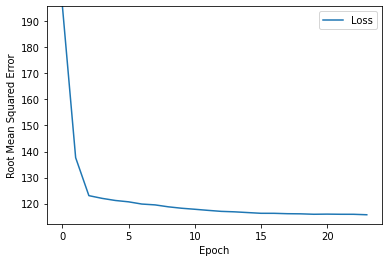

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             191
    2     92             203
    2     69             197
    2     62             214
    1     80             188
    2    295             229
    2    500             213
    2    342             227
    4    118             294
    2    128             217
    2    187             227
    3     80             238
    2    112             228
    2     95             222
    2     69             213


In [ ]:
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


In [ ]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0
